In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'city_day.csv',
 'city_day.csv.zip',
 'city_hour.csv',
 'city_hour.csv.zip',
 'stations.csv',
 'station_day.csv',
 'station_day.csv.zip',
 'station_hour.csv',
 'station_hour.csv.zip',
 'Untitled.ipynb']

In [4]:
df = pd.read_csv("city_hour.csv")

In [5]:
df.head()

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN

In [7]:
df.shape

(628457, 16)

In [10]:
len(list(df.AQI.value_counts()))

1555

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628457 entries, 0 to 628456
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        628457 non-null  object 
 1   Datetime    628457 non-null  object 
 2   PM2.5       497566 non-null  float64
 3   PM10        347322 non-null  float64
 4   NO          524465 non-null  float64
 5   NO2         524086 non-null  float64
 6   NOx         512496 non-null  float64
 7   NH3         373003 non-null  float64
 8   CO          547874 non-null  float64
 9   SO2         510849 non-null  float64
 10  O3          513240 non-null  float64
 11  Benzene     476660 non-null  float64
 12  Toluene     422789 non-null  float64
 13  Xylene      207234 non-null  float64
 14  AQI         511703 non-null  float64
 15  AQI_Bucket  511703 non-null  object 
dtypes: float64(13), object(3)
memory usage: 76.7+ MB


In [12]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         130891
PM10          281135
NO            103992
NO2           104371
NOx           115961
NH3           255454
CO             80583
SO2           117608
O3            115217
Benzene       151797
Toluene       205668
Xylene        421223
AQI           116754
AQI_Bucket    116754
dtype: int64

### 1. Visualize the relation between SO2 and AQI.

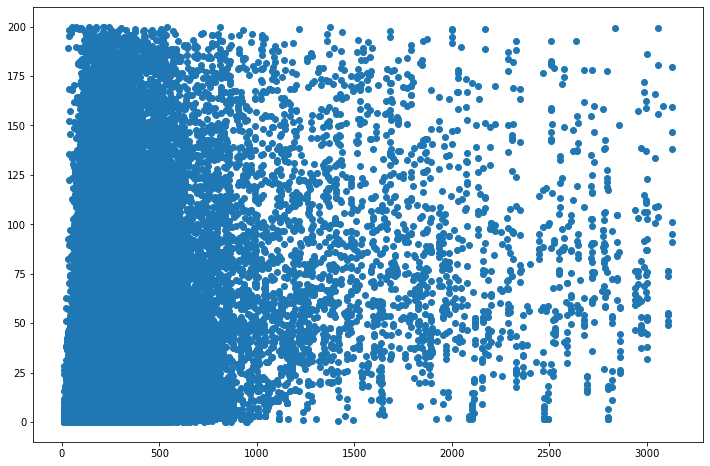

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(df.AQI, df.SO2)
plt.show()

In [28]:
df_aqi = df[df["AQI"]<600]
df_aqi = df_aqi[df_aqi["SO2"]<125]

In [29]:
df_aqi.shape

(474428, 16)

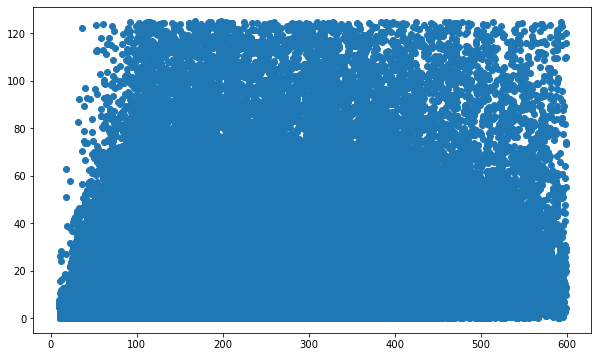

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_aqi.AQI, df_aqi.SO2)
plt.show()

In [33]:
df_citygrp = df.groupby("City")
df_citygrp["AQI"].mean()

City
Ahmedabad             469.014034
Aizawl                 50.104907
Amaravati              98.913961
Amritsar              122.291089
Bengaluru              95.408035
Bhopal                146.210270
Brajrajnagar          152.021114
Chandigarh            103.739933
Chennai               114.908139
Delhi                 264.036427
Ernakulam              87.756744
Gurugram              227.726436
Guwahati              153.451830
Hyderabad             110.857335
Jaipur                135.811545
Jorapokhar            162.185895
Kochi                 113.721481
Kolkata               148.704975
Lucknow               221.981255
Mumbai                110.086191
Patna                 243.957445
Shillong               63.162825
Talcher               183.393459
Thiruvananthapuram     77.657681
Name: AQI, dtype: float64

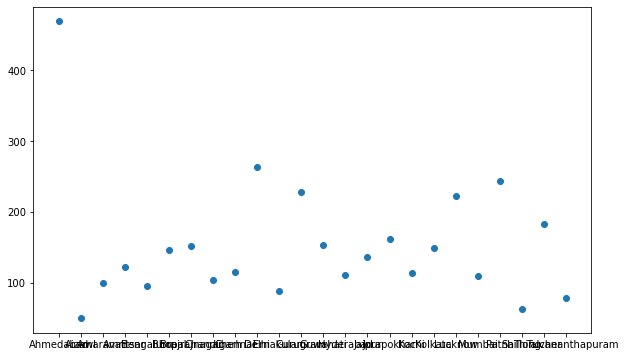

In [36]:
city_lst = df["City"].unique()
plt.figure(figsize=(10, 6))
plt.scatter(city_lst, df_citygrp["AQI"].mean())
plt.show()

### AQI bucket with each city

In [37]:
df["AQI_Bucket"].value_counts()

Moderate        176169
Satisfactory    158327
Poor             64257
Very Poor        56825
Good             28507
Severe           27618
Name: AQI_Bucket, dtype: int64

In [40]:
df[["Datetime", "AQI"]].tail(10)

Datetime   AQI
628447  2020-04-30 15:00:00  52.0
628448  2020-04-30 16:00:00  52.0
628449  2020-04-30 17:00:00  52.0
628450  2020-04-30 18:00:00  62.0
628451  2020-04-30 19:00:00  82.0
628452  2020-04-30 20:00:00  82.0
628453  2020-04-30 21:00:00  82.0
628454  2020-04-30 22:00:00  82.0
628455  2020-04-30 23:00:00  82.0
628456  2020-05-01 00:00:00  82.0

In [38]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [42]:
df.Datetime.unique

<bound method Series.unique of 0         2015-01-01 01:00:00
1         2015-01-01 02:00:00
2         2015-01-01 03:00:00
3         2015-01-01 04:00:00
4         2015-01-01 05:00:00
                 ...         
628452    2020-04-30 20:00:00
628453    2020-04-30 21:00:00
628454    2020-04-30 22:00:00
628455    2020-04-30 23:00:00
628456    2020-05-01 00:00:00
Name: Datetime, Length: 628457, dtype: object>

In [62]:
df["time in hours"] = pd.to_datetime(df["Datetime"]).dt.time
df.head()

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket time in hours  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN      01:00:00  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN      02:00:00  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN      03:00:00  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN      04:00:00  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN      05:00:00

In [49]:
df.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.807409  0.372686  0.293820  0.380177  0.227342  0.076295   
PM10     0.807409  1.000000  0.447960  0.425234  0.479887  0.338467  0.095020   
NO       0.372686  0.447960  1.000000  0.439524  0.803269  0.169889  0.324394   
NO2      0.293820  0.425234  0.439524  1.000000  0.609532  0.225834  0.276382   
NOx      0.380177  0.479887  0.803269  0.609532  1.000000  0.153286  0.280431   
NH3      0.227342  0.338467  0.169889  0.225834  0.153286  1.000000  0.098336   
CO       0.076295  0.095020  0.324394  0.276382  0.280431  0.098336  1.000000   
SO2      0.115931  0.227549  0.125713  0.307949  0.173482 -0.013185  0.280969   
O3       0.040822  0.114710 -0.096575  0.077528 -0.064479  0.051493 -0.051334   
Benzene  0.031622  0.027861  0.072851  0.048404  0.073948 -0.008901  0.070072   
Toluene  0.121930  0.176754  0.197763  0.275266  0.228637  0.020015  0.247550   
Xylene   0.108023  0.086653  0.139621  0.173732  0.128339 -0.009450  0.172136   
AQI      0.487271  0.661635  0.344242  0.431853  0.383215  0.209064  0.583703   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.115931  0.040822  0.031622  0.121930  0.108023  0.487271  
PM10     0.227549  0.114710  0.027861  0.176754  0.086653  0.661635  
NO       0.125713 -0.096575  0.072851  0.197763  0.139621  0.344242  
NO2      0.307949  0.077528  0.048404  0.275266  0.173732  0.431853  
NOx      0.173482 -0.064479  0.073948  0.228637  0.128339  0.383215  
NH3     -0.013185  0.051493 -0.008901  0.020015 -0.009450  0.209064  
CO       0.280969 -0.051334  0.070072  0.247550  0.172136  0.583703  
SO2      1.000000  0.110272  0.027961  0.245209  0.183139  0.384299  
O3       0.110272  1.000000 -0.008170  0.042833  0.008707  0.085789  
Benzene  0.027961 -0.008170  1.000000  0.752478  0.399598  0.054187  
Toluene  0.245209  0.042833  0.752478  1.000000  0.431016  0.262655  
Xylene   0.183139  0.008707  0.399598  0.431016  1.000000  0.153611  
AQI      0.384299  0.085789  0.054187  0.262655  0.153611  1.000000

In [63]:
def to_num(x):
    x = str(x)
    if x == "01:00:00":
        return 1
    elif x== "02:00:00":
        return 2
    elif x == "03:00:00":
        return 3
    elif x == "04:00:00":
        return 4
    elif x == "05:00:00":
        return 5
    elif x == "06:00:00":
        return 6
    elif x == "07:00:00":
        return 7
    elif x == "08:00:00":
        return 8
    elif x == "09:00:00":
        return 9
    elif x == "10:00:00":
        return 10
    elif x == "11:00:00":
        return 11
    elif x == "12:00:00":
        return 12
    elif x == "13:00:00":
        return 13
    elif x == "14:00:00":
        return 14
    elif x == "15:00:00":
        return 15
    elif x == "16:00:00":
        return 16
    elif x == "17:00:00":
        return 17
    elif x == "18:00:00":
        return 18
    elif x == "19:00:00":
        return 19
    elif x == "20:00:00":
        return 20
    elif x == "21:00:00":
        return 21
    elif x == "22:00:00":
        return 22
    elif x == "23:00:00":
        return 23
    elif x == "24:00:00":
        return 24
df["time in hours"] = df["time in hours"].apply(to_num)
df.head()

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  time in hours  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN            1.0  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN            2.0  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN            3.0  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN            4.0  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN            5.0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628457 entries, 0 to 628456
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           628457 non-null  object 
 1   Datetime       628457 non-null  object 
 2   PM2.5          497566 non-null  float64
 3   PM10           347322 non-null  float64
 4   NO             524465 non-null  float64
 5   NO2            524086 non-null  float64
 6   NOx            512496 non-null  float64
 7   NH3            373003 non-null  float64
 8   CO             547874 non-null  float64
 9   SO2            510849 non-null  float64
 10  O3             513240 non-null  float64
 11  Benzene        476660 non-null  float64
 12  Toluene        422789 non-null  float64
 13  Xylene         207234 non-null  float64
 14  AQI            511703 non-null  float64
 15  AQI_Bucket     511703 non-null  object 
 16  time in hours  602262 non-null  float64
dtypes: float64(14), object(3)
mem

In [65]:
df.corr()

PM2.5      PM10        NO       NO2       NOx       NH3  \
PM2.5          1.000000  0.807409  0.372686  0.293820  0.380177  0.227342   
PM10           0.807409  1.000000  0.447960  0.425234  0.479887  0.338467   
NO             0.372686  0.447960  1.000000  0.439524  0.803269  0.169889   
NO2            0.293820  0.425234  0.439524  1.000000  0.609532  0.225834   
NOx            0.380177  0.479887  0.803269  0.609532  1.000000  0.153286   
NH3            0.227342  0.338467  0.169889  0.225834  0.153286  1.000000   
CO             0.076295  0.095020  0.324394  0.276382  0.280431  0.098336   
SO2            0.115931  0.227549  0.125713  0.307949  0.173482 -0.013185   
O3             0.040822  0.114710 -0.096575  0.077528 -0.064479  0.051493   
Benzene        0.031622  0.027861  0.072851  0.048404  0.073948 -0.008901   
Toluene        0.121930  0.176754  0.197763  0.275266  0.228637  0.020015   
Xylene         0.108023  0.086653  0.139621  0.173732  0.128339 -0.009450   
AQI            0.487271  0.661635  0.344242  0.431853  0.383215  0.209064   
time in hours -0.014548  0.045492  0.008814  0.114592  0.038078 -0.000041   

                     CO       SO2        O3   Benzene   Toluene    Xylene  \
PM2.5          0.076295  0.115931  0.040822  0.031622  0.121930  0.108023   
PM10           0.095020  0.227549  0.114710  0.027861  0.176754  0.086653   
NO             0.324394  0.125713 -0.096575  0.072851  0.197763  0.139621   
NO2            0.276382  0.307949  0.077528  0.048404  0.275266  0.173732   
NOx            0.280431  0.173482 -0.064479  0.073948  0.228637  0.128339   
NH3            0.098336 -0.013185  0.051493 -0.008901  0.020015 -0.009450   
CO             1.000000  0.280969 -0.051334  0.070072  0.247550  0.172136   
SO2            0.280969  1.000000  0.110272  0.027961  0.245209  0.183139   
O3            -0.051334  0.110272  1.000000 -0.008170  0.042833  0.008707   
Benzene        0.070072  0.027961 -0.008170  1.000000  0.752478  0.399598   
Toluene        0.247550  0.245209  0.042833  0.752478  1.000000  0.431016   
Xylene         0.172136  0.183139  0.008707  0.399598  0.431016  1.000000   
AQI            0.583703  0.384299  0.085789  0.054187  0.262655  0.153611   
time in hours  0.034218  0.010350  0.125046  0.004927  0.019311  0.041185   

                    AQI  time in hours  
PM2.5          0.487271      -0.014548  
PM10           0.661635       0.045492  
NO             0.344242       0.008814  
NO2            0.431853       0.114592  
NOx            0.383215       0.038078  
NH3            0.209064      -0.000041  
CO             0.583703       0.034218  
SO2            0.384299       0.010350  
O3             0.085789       0.125046  
Benzene        0.054187       0.004927  
Toluene        0.262655       0.019311  
Xylene         0.153611       0.041185  
AQI            1.000000      -0.014282  
time in hours -0.014282       1.000000

### Time series plot for AQI

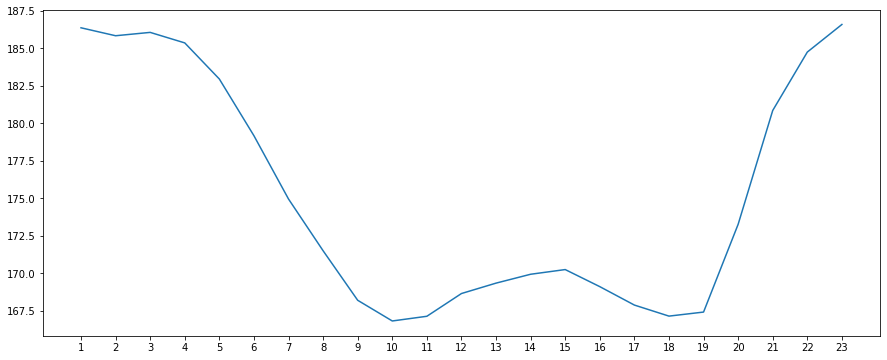

In [89]:
df_timegrp = df.groupby("time in hours")
time_lst = df["time in hours"].unique()
time_lst = time_lst[:-1]#removing nan value because of mismatch in size after groupby
plt.figure(figsize=(15,6))
plt.plot(time_lst, df_timegrp["AQI"].mean())
plt.xticks(np.arange(1.0, 24.0, 1.0))
plt.show()

### Time series plot for AQI across cities

In [86]:
df_citygrp2 = df.groupby("City")
city_lst

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram'], dtype=object)

In [99]:
def city_time_series_plot(df_city, city):
    df_timegrp = df.groupby("time in hours")
    time_lst = df["time in hours"].unique()
    time_lst = time_lst[:-1]#removing nan value because of mismatch in size after groupby
    plt.figure(figsize=(10,6))
    plt.plot(time_lst, df_timegrp["AQI"].mean())
    plt.xticks(np.arange(1.0, 24.0, 1.0))
    plt.title("Time series plot for : {}".format(city))
    plt.show()

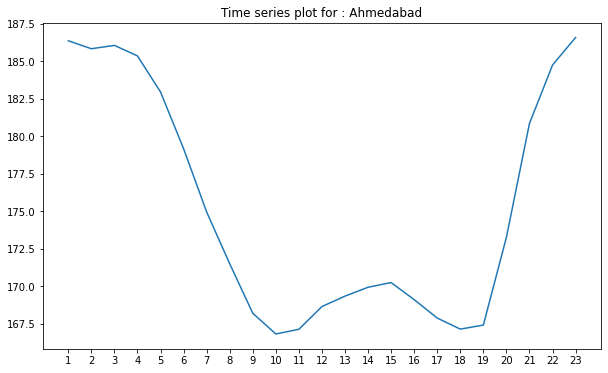

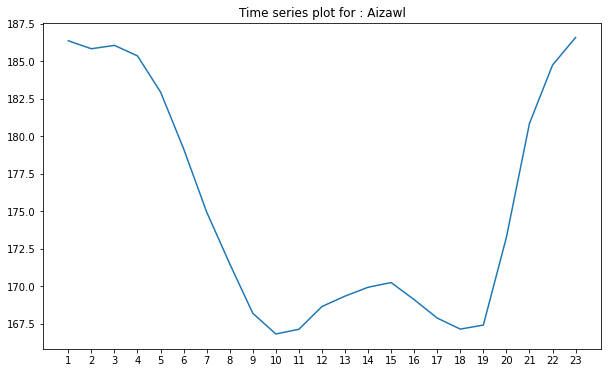

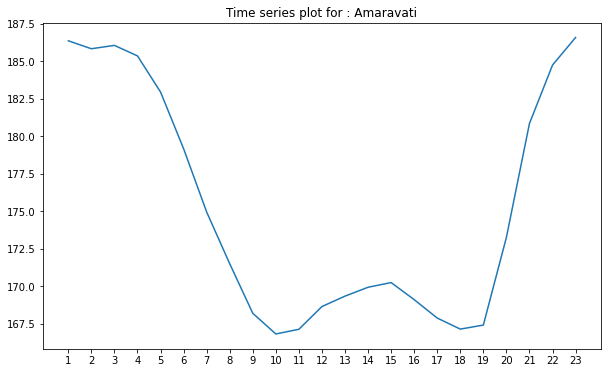

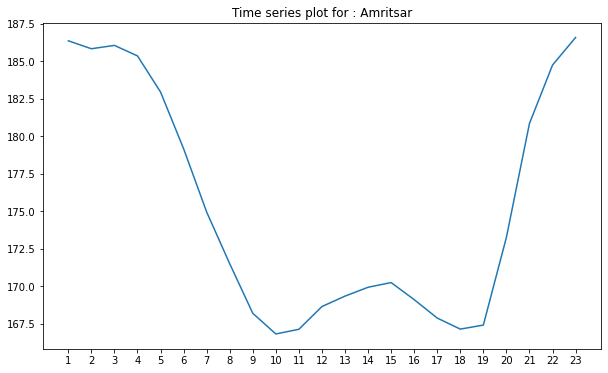

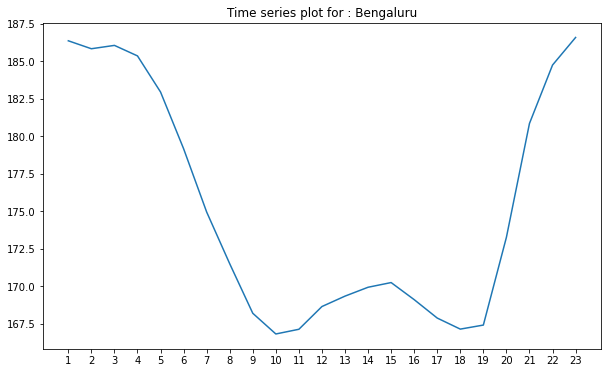

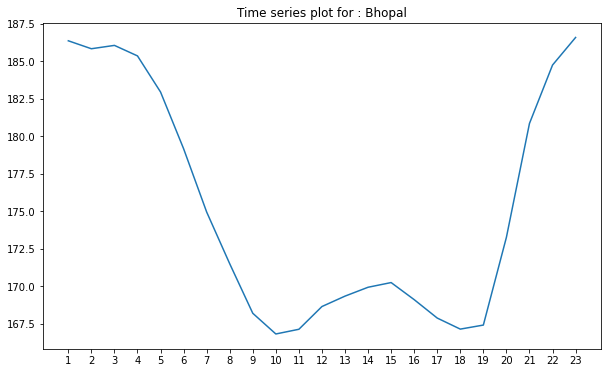

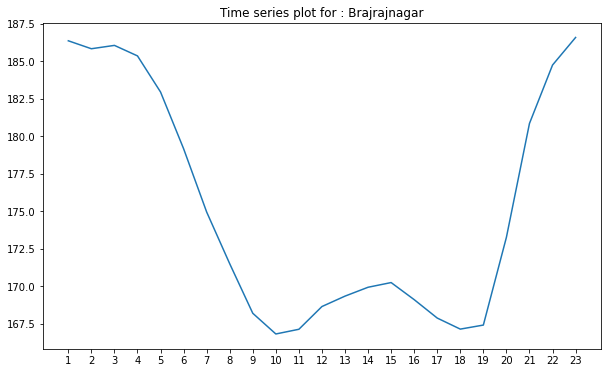

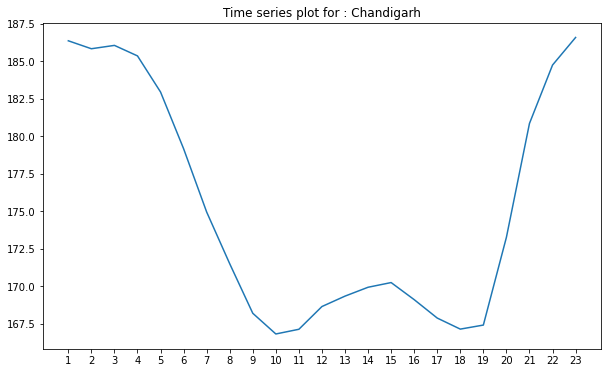

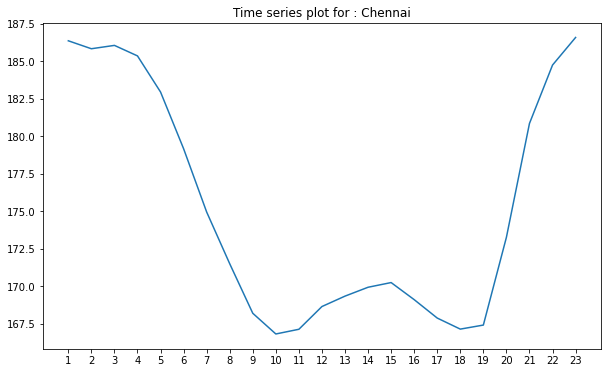

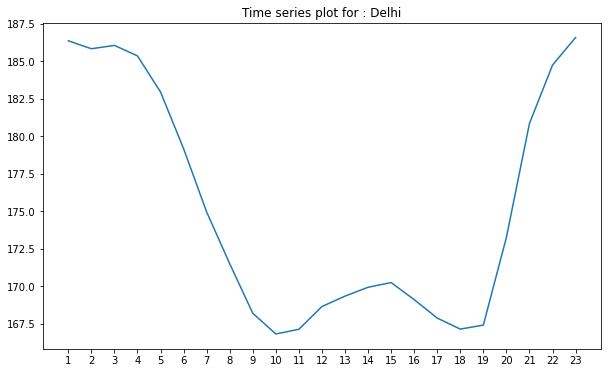

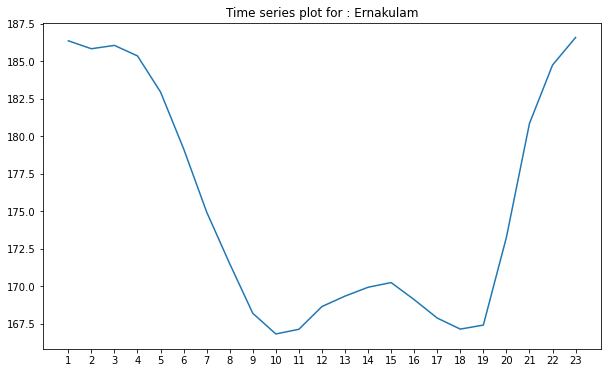

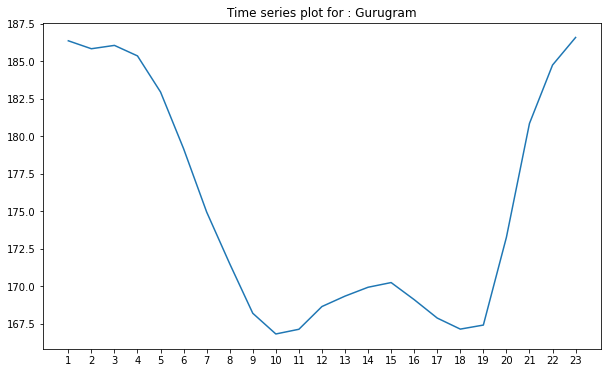

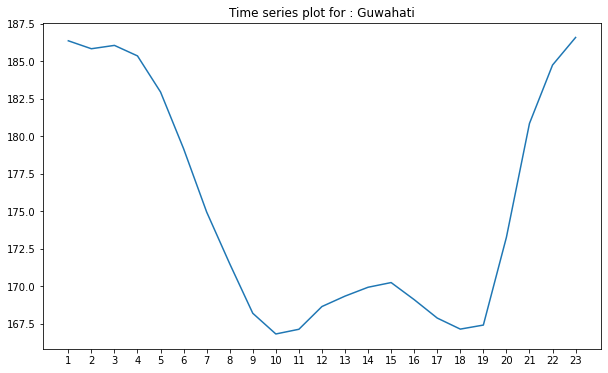

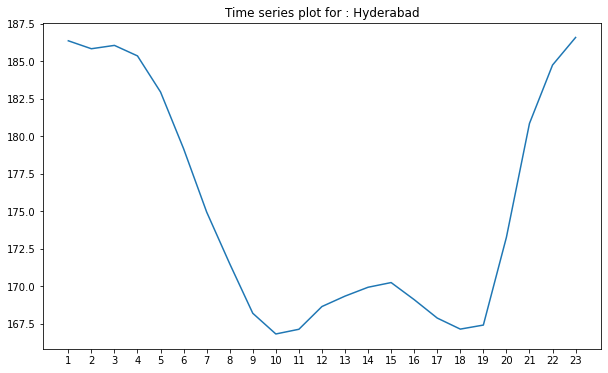

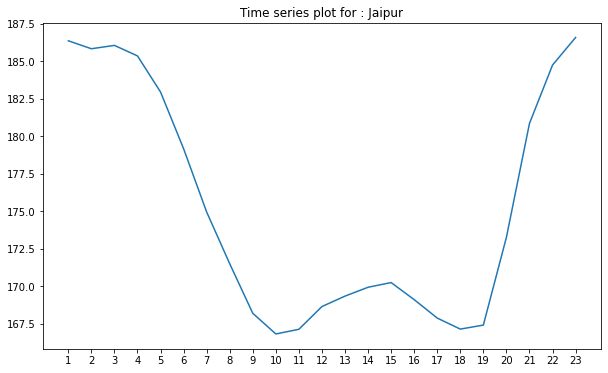

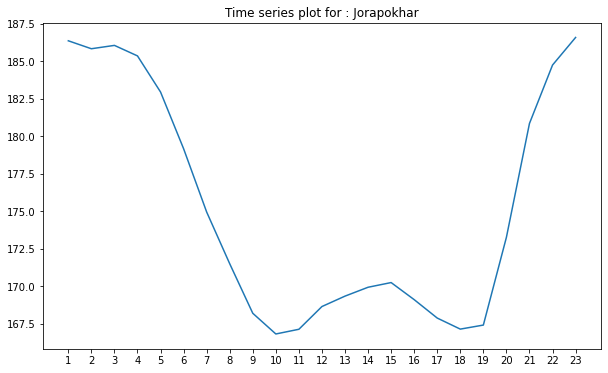

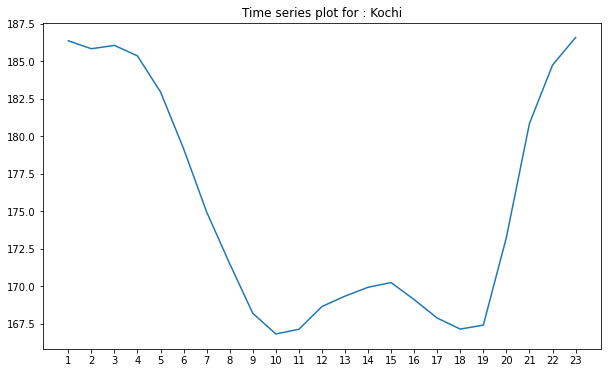

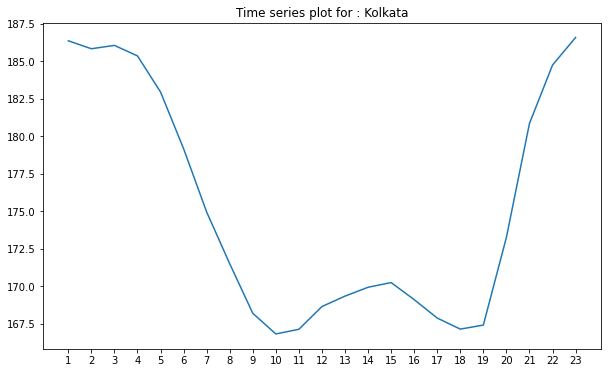

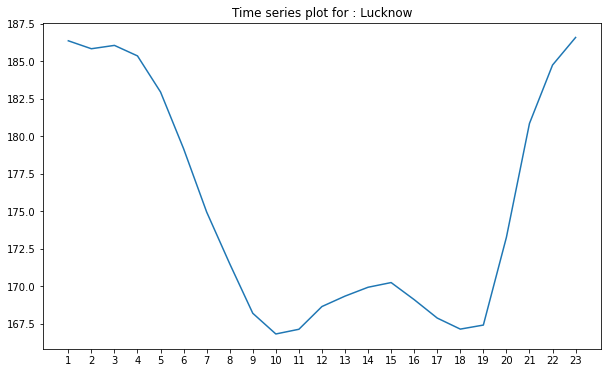

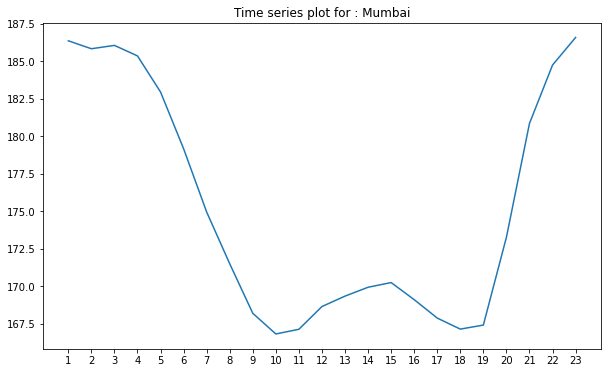

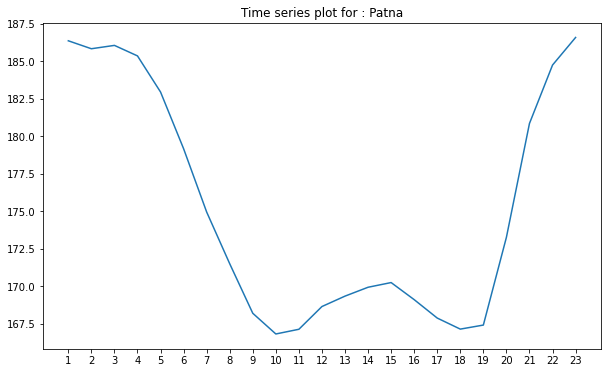

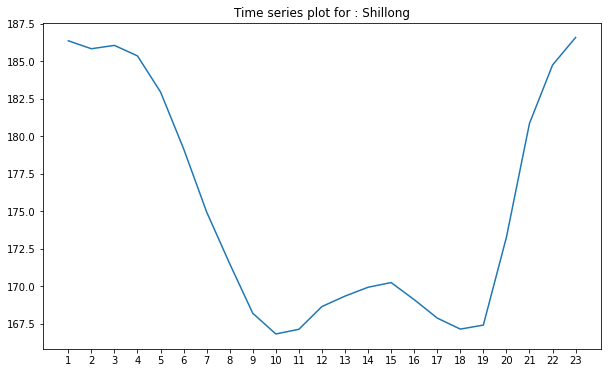

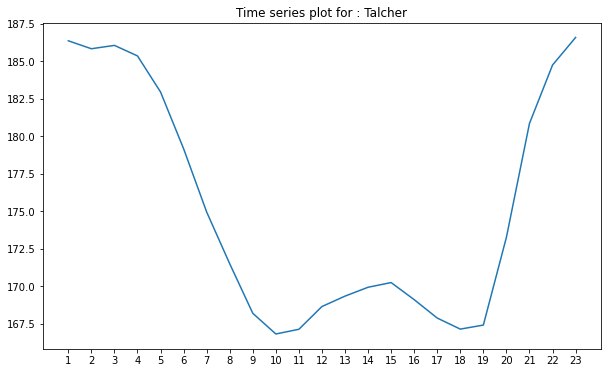

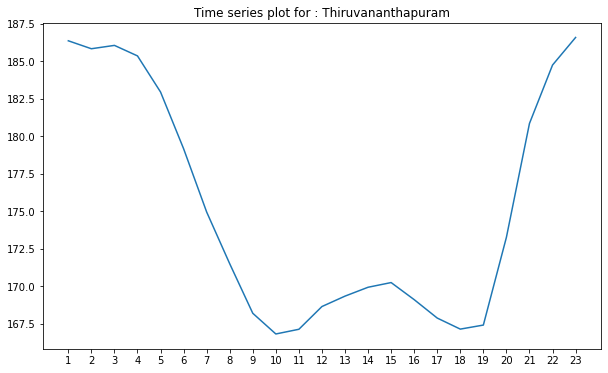

In [100]:
for city in city_lst:
    df_city = df_citygrp2.get_group(city)
    city_time_series_plot(df_city, city)